1). Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет(ресемплинг) в представление по 1 месяцу.  
2). Подберите параметры модели SARIMAX для этого ряда.  
3). Сделайте вывод о том, как изменилась модель по сравнению с недельной.  

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [5]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [9]:
data.columns.drop('Time') 
data_m = data.resample("M").mean()
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


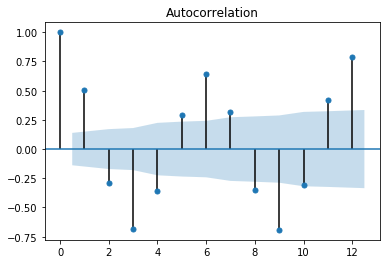

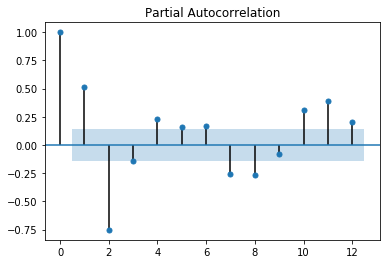

In [12]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=12)
plt.show()

In [14]:
import itertools
import warnings

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [16]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-14],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4368.713353745632
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:3969.5931530598245
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3668.8498120298946
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3111.1623087149655
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2887.2022822317535
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2659.1196706432615
ARIMA(0, 0, 0)x(0, 2, 0, 12)3 - AIC:3060.6007044277094
ARIMA(0, 0, 0)x(0, 2, 1, 12)3 - AIC:2874.6141233913477
ARIMA(0, 0, 0)x(0, 2, 2, 12)3 - AIC:2538.427096643463
ARIMA(0, 0, 0)x(1, 0, 0, 12)3 - AIC:3133.9303182224576
ARIMA(0, 0, 0)x(1, 0, 1, 12)3 - AIC:3113.3768046053656
ARIMA(0, 0, 0)x(1, 0, 2, 12)3 - AIC:2870.4087468010684
ARIMA(0, 0, 0)x(1, 1, 0, 12)3 - AIC:2897.608647255767
ARIMA(0, 0, 0)x(1, 1, 1, 12)3 - AIC:2880.888556658375
ARIMA(0, 0, 0)x(1, 1, 2, 12)3 - AIC:2652.027264090975
ARIMA(0, 0, 0)x(1, 2, 0, 12)3 - AIC:2792.613790289448
ARIMA(0, 0, 0)x(1, 2, 1, 12)3 - AIC:2762.6385613517377
ARIMA(0, 0, 0)x(1, 2, 2, 12)3 - AIC:2529.3072898638384
ARIMA(0, 0, 0)x(

ARIMA(0, 1, 2)x(1, 2, 1, 12)3 - AIC:2647.811881756753
ARIMA(0, 1, 2)x(1, 2, 2, 12)3 - AIC:2405.7610673665345
ARIMA(0, 1, 2)x(2, 0, 0, 12)3 - AIC:2866.1079974281247
ARIMA(0, 1, 2)x(2, 0, 1, 12)3 - AIC:2844.6328026032106
ARIMA(0, 1, 2)x(2, 0, 2, 12)3 - AIC:2793.223291882925
ARIMA(0, 1, 2)x(2, 1, 0, 12)3 - AIC:2647.5590929070113
ARIMA(0, 1, 2)x(2, 1, 1, 12)3 - AIC:2635.3315031781076
ARIMA(0, 1, 2)x(2, 1, 2, 12)3 - AIC:2573.6751331623136
ARIMA(0, 1, 2)x(2, 2, 0, 12)3 - AIC:2513.4855323765737
ARIMA(0, 1, 2)x(2, 2, 1, 12)3 - AIC:2471.0386354641014
ARIMA(0, 1, 2)x(2, 2, 2, 12)3 - AIC:2407.318718396378
ARIMA(0, 2, 0)x(0, 0, 0, 12)3 - AIC:3562.6984799486495
ARIMA(0, 2, 0)x(0, 0, 1, 12)3 - AIC:3296.0864207995774
ARIMA(0, 2, 0)x(0, 0, 2, 12)3 - AIC:3055.456868194605
ARIMA(0, 2, 0)x(0, 1, 0, 12)3 - AIC:3291.1379726072532
ARIMA(0, 2, 0)x(0, 1, 1, 12)3 - AIC:3016.05270226195
ARIMA(0, 2, 0)x(0, 1, 2, 12)3 - AIC:2789.1261034478903
ARIMA(0, 2, 0)x(0, 2, 0, 12)3 - AIC:3234.1258280740512
ARIMA(0, 2, 0)x(

ARIMA(1, 0, 2)x(0, 1, 2, 12)3 - AIC:2604.8481071313513
ARIMA(1, 0, 2)x(0, 2, 0, 12)3 - AIC:3012.803948700705
ARIMA(1, 0, 2)x(0, 2, 1, 12)3 - AIC:2676.5747503184493
ARIMA(1, 0, 2)x(0, 2, 2, 12)3 - AIC:2480.6056179101265
ARIMA(1, 0, 2)x(1, 0, 0, 12)3 - AIC:3097.1515082671476
ARIMA(1, 0, 2)x(1, 0, 1, 12)3 - AIC:3141.3154086697223
ARIMA(1, 0, 2)x(1, 0, 2, 12)3 - AIC:2919.224795014349
ARIMA(1, 0, 2)x(1, 1, 0, 12)3 - AIC:2861.184024699808
ARIMA(1, 0, 2)x(1, 1, 1, 12)3 - AIC:2821.2679923237783
ARIMA(1, 0, 2)x(1, 1, 2, 12)3 - AIC:2591.6778883741836
ARIMA(1, 0, 2)x(1, 2, 0, 12)3 - AIC:2759.858244010936
ARIMA(1, 0, 2)x(1, 2, 1, 12)3 - AIC:2704.8419981190336
ARIMA(1, 0, 2)x(1, 2, 2, 12)3 - AIC:2481.9040665795037
ARIMA(1, 0, 2)x(2, 0, 0, 12)3 - AIC:2864.2495063543615
ARIMA(1, 0, 2)x(2, 0, 1, 12)3 - AIC:2956.786744399771
ARIMA(1, 0, 2)x(2, 0, 2, 12)3 - AIC:2921.1485189273835
ARIMA(1, 0, 2)x(2, 1, 0, 12)3 - AIC:2630.7401019380595
ARIMA(1, 0, 2)x(2, 1, 1, 12)3 - AIC:2629.8416801136414
ARIMA(1, 0, 2)x

ARIMA(1, 2, 1)x(2, 1, 0, 12)3 - AIC:2652.0646738176383
ARIMA(1, 2, 1)x(2, 1, 1, 12)3 - AIC:2636.6902190494657
ARIMA(1, 2, 1)x(2, 1, 2, 12)3 - AIC:2642.7302565387026
ARIMA(1, 2, 1)x(2, 2, 0, 12)3 - AIC:2510.1424984818022
ARIMA(1, 2, 1)x(2, 2, 1, 12)3 - AIC:2470.920560058123
ARIMA(1, 2, 1)x(2, 2, 2, 12)3 - AIC:2460.0560447728485
ARIMA(1, 2, 2)x(0, 0, 0, 12)3 - AIC:3483.2117364476376
ARIMA(1, 2, 2)x(0, 0, 1, 12)3 - AIC:3166.707813106744
ARIMA(1, 2, 2)x(0, 0, 2, 12)3 - AIC:2927.845684701925
ARIMA(1, 2, 2)x(0, 1, 0, 12)3 - AIC:3106.646420611424
ARIMA(1, 2, 2)x(0, 1, 1, 12)3 - AIC:2822.452259106465
ARIMA(1, 2, 2)x(0, 1, 2, 12)3 - AIC:2609.9401381701205
ARIMA(1, 2, 2)x(0, 2, 0, 12)3 - AIC:3041.2171659213714
ARIMA(1, 2, 2)x(0, 2, 1, 12)3 - AIC:2740.210374304579
ARIMA(1, 2, 2)x(0, 2, 2, 12)3 - AIC:2502.3991462567587
ARIMA(1, 2, 2)x(1, 0, 0, 12)3 - AIC:3120.851460997129
ARIMA(1, 2, 2)x(1, 0, 1, 12)3 - AIC:3076.1638557449405
ARIMA(1, 2, 2)x(1, 0, 2, 12)3 - AIC:2851.9699261740434
ARIMA(1, 2, 2)x(1

ARIMA(2, 1, 1)x(1, 0, 2, 12)3 - AIC:2809.43138670586
ARIMA(2, 1, 1)x(1, 1, 0, 12)3 - AIC:2846.6550006128286
ARIMA(2, 1, 1)x(1, 1, 1, 12)3 - AIC:2812.184872171752
ARIMA(2, 1, 1)x(1, 1, 2, 12)3 - AIC:2611.055170953088
ARIMA(2, 1, 1)x(1, 2, 0, 12)3 - AIC:2737.034284783117
ARIMA(2, 1, 1)x(1, 2, 1, 12)3 - AIC:2661.6339342722968
ARIMA(2, 1, 1)x(1, 2, 2, 12)3 - AIC:2421.59159484989
ARIMA(2, 1, 1)x(2, 0, 0, 12)3 - AIC:2847.209029496656
ARIMA(2, 1, 1)x(2, 0, 1, 12)3 - AIC:2840.054181046419
ARIMA(2, 1, 1)x(2, 0, 2, 12)3 - AIC:2824.1504248799247
ARIMA(2, 1, 1)x(2, 1, 0, 12)3 - AIC:2613.8356286659773
ARIMA(2, 1, 1)x(2, 1, 1, 12)3 - AIC:2599.5171669977776
ARIMA(2, 1, 1)x(2, 1, 2, 12)3 - AIC:2611.6280577973075
ARIMA(2, 1, 1)x(2, 2, 0, 12)3 - AIC:2476.876852908847
ARIMA(2, 1, 1)x(2, 2, 1, 12)3 - AIC:2433.424184281985
ARIMA(2, 1, 1)x(2, 2, 2, 12)3 - AIC:2441.5743246129127
ARIMA(2, 1, 2)x(0, 0, 0, 12)3 - AIC:3292.509237449386
ARIMA(2, 1, 2)x(0, 0, 1, 12)3 - AIC:3041.6042479840726
ARIMA(2, 1, 2)x(0, 0, 

Лучшие значения ARIMA(1, 1, 2)x(2, 2, 2, 12)3 - AIC:2405.1162177304104

In [20]:
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-3],order=[1,1,2],
                                seasonal_order=[2,2,2,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)


AIC:{} 2646.86378685359


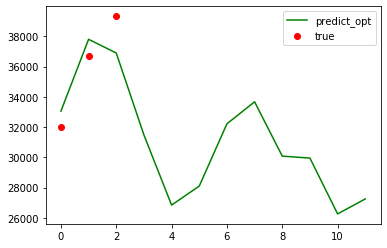

In [41]:
pred_dynamic_opt = results_opt.forecast(12)

plt.plot(pred_dynamic_opt,'g', label='predict_opt' )

plt.plot(data_m['PJME_MW'].values[-3:],'or',label='true')
plt.legend()

plt.show()

Поведение модели c месячным ресемплингом по сравнению с недельным фундаментально не изменилось

4). Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

In [25]:
brent_data = pd.read_csv('my_BRENT2019.csv', sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [26]:
brent_data_w = brent_data.resample('W').mean()
brent_data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


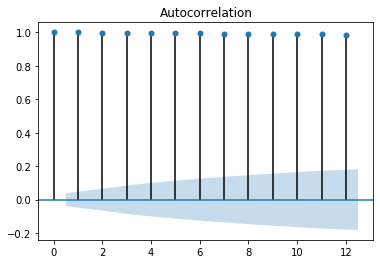

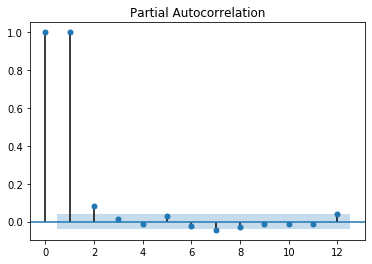

In [27]:
sm.graphics.tsa.plot_acf(brent_data['Значение'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(brent_data['Значение'].values, lags=12)
plt.show()

In [43]:
d = [0,1]
p = [0,1] 
q = range(3, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(brent_data['Значение'].values[:-12]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:-1769.123878940396
ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:-1905.356470674164
ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:-2024.657526327269
ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:-2104.31251063478
ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:-14044.51870416538
ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:-14038.132783160574
ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:-14030.31837909057
ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:-14026.316175934671
ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-14052.985158830848
ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC:-14046.435785126701
ARIMA(1, 0, 5)x[0, 0, 0, 0] - AIC:-14038.61026543516
ARIMA(1, 0, 6)x[0, 0, 0, 0] - AIC:-14034.612617668128
ARIMA(1, 1, 3)x[0, 0, 0, 0] - AIC:-14042.425066717024
ARIMA(1, 1, 4)x[0, 0, 0, 0] - AIC:-14034.821253454887
ARIMA(1, 1, 5)x[0, 0, 0, 0] - AIC:-14028.18632641801
ARIMA(1, 1, 6)x[0, 0, 0, 0] - AIC:-14023.197462311888


Определяем параметры как ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-14052.985158830848

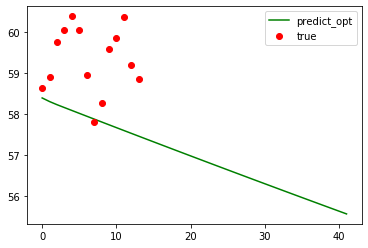

In [48]:
modb_opt = sm.tsa.statespace.SARIMAX(brent_data['Значение'].values[:-14],
                               order=[1,0,3],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic_opt = resultsb_opt.forecast(42) 

plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-14:],'or',label='true')
plt.legend()
plt.plot()
plt.show()

5).Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA

*Вывод сделать тяжело, т.к. не совсем понял смысл происходящего с моделями ARIMA. На мой взгляд в обоих случаям они не очень хорошо работают, в лучшем случае предсказывают какой-то общий долгосрочный тренд*